In [28]:
# Import de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definiçao de estilo pra plots
plt.style.use('seaborn-darkgrid')

In [3]:
# Definiçao de caminhos e arquivos
basePath = "./dados/"
filename = "DATA.csv"

In [4]:
# Leitura e visualizaçao do dataset
dataset = pd.read_csv(basePath + filename)
df = pd.DataFrame(dataset)
df.head()

,DATA,DIESEL,ETANOL,GASOLINA,GNV,DOLAR
0,2009/01,2.104709,1.319564,2.430545,1.812543,2.302800
1,2009/02,2.104824,1.349922,2.432393,1.825376,2.337450
2,2009/03,2.105211,1.321463,2.427913,1.811821,2.343275
3,2009/04,2.104267,1.257083,2.417623,1.801233,2.245700
4,2009/05,2.104677,1.220271,2.412288,1.785337,2.079025


In [5]:
# Calculos e visualizaçao de informaçoes basicas de estatistica
df_indices = df.drop(["DATA"], axis=1)
keys = list(df_indices.keys().values)
indices = pd.DataFrame()
indices[""] = keys
indices["MÍNIMO"] = df_indices.min().values
indices["MÁXIMO"] = df_indices.max().values
indices["MÉDIA"] = df_indices.mean().values
indices["DESVIO PADRÃO"] = df_indices.std().values
indices["VARIÂNCIA"] = df_indices.var().values
indices

,,MÍNIMO,MÁXIMO,MÉDIA,DESVIO PADRÃO,VARIÂNCIA
0,DIESEL,1.960769,3.610143,2.482806,0.494487,0.244518
1,ETANOL,1.159287,2.898993,2.021975,0.450270,0.202743
2,GASOLINA,2.396070,4.545876,3.046089,0.569907,0.324794
3,GNV,1.286576,2.460067,1.831810,0.321571,0.103408
4,DOLAR,1.556125,4.080325,2.561659,0.767275,0.588711


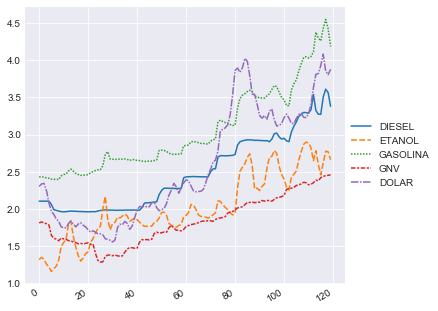

In [6]:
# Visualizaçao de plot de dados historicos das variaveis
g = sns.relplot(kind="line",  ci=None,  data=df_indices)
g.fig.autofmt_xdate()

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

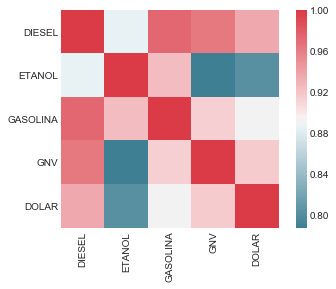

In [7]:
# Calculo e visualizaçao da Matriz de correlaçao
keys = ['DIESEL', 'ETANOL', 'GASOLINA', 'GNV', 'DOLAR']
dados = df[keys]

f, ax = plt.subplots(figsize=(6, 4))
corr = dados.corr(method='pearson')

sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.yticks(rotation=0) 

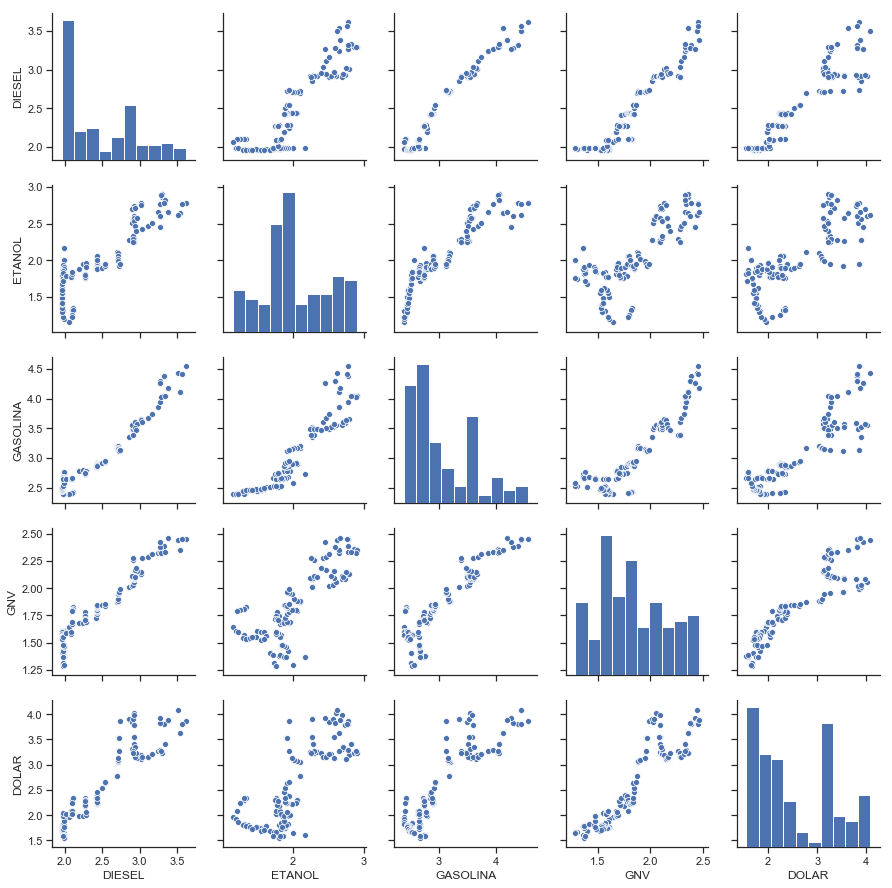

In [8]:
# Plot dos pontos de disperssao em par
sns.set(style="ticks")
sns.pairplot(dados)

In [9]:
# Definiçao de variveis independentes
x = df[["DOLAR", "GASOLINA", "ETANOL", "GNV"]]
# Definiçao da variavel dependente
y = df["DIESEL"]

# Calculo OLS e visualizaçao de relatorio
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DIESEL   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.07e-103
Time:                        21:04:31   Log-Likelihood:                 166.38
No. Observations:                 120   AIC:                            -322.8
Df Residuals:                     115   BIC:                            -308.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1287      0.044     -2.939      0.0

C:\Users\Marco\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


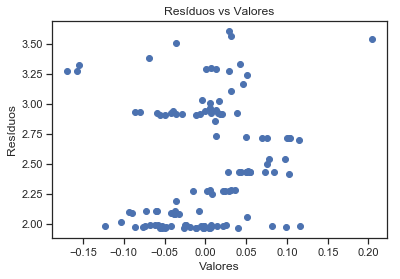

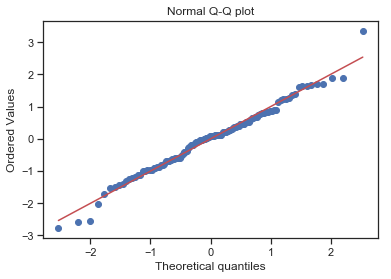

Radiação Solar: W: 0.9870 p-value: 0.3063


C:\Users\marco.daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


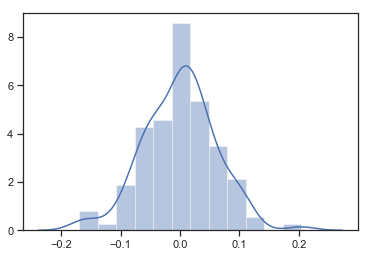

In [10]:
### Plot dos Residuos vs Valores
plt.plot(model.resid, y, 'o')
plt.title('Resíduos vs Valores')
plt.ylabel('Resíduos')
plt.xlabel('Valores')
plt.show()

### Q-Q Plot
z = (model.resid - model.resid.mean()) / model.resid.std()
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Teste de Shapiro
w, p = stats.shapiro(model.resid)
print("Radiação Solar: W: %.4f p-value: %.4f" % (w,p))

### Distr. Histograma
sns.distplot(model.resid)

In [30]:
# Separaçao dos dados - Metodo Hold Out
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Normalizar valor de X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento da regressao linear multipla
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)

# Prints de resultados do treinamento
print("R-squared")
print(linearRegressor.score(X_train, y_train))

print("Intercepto ou Coeficiente Linear")
print(linearRegressor.intercept_)

print("Coeficiente Angular (slope)")
print(linearRegressor.coef_)

# Realiza a previsao dos valores e printa tabela de resultados
print("Previsão")
y_pred = linearRegressor.predict(X_test)
pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred})

R-squared
0.9842110586187873
Intercepto ou Coeficiente Linear
2.498675999952564
Coeficiente Angular (slope)
[0.0681352  0.20178948 0.04254587 0.19784493]
Previsão


,Valor Real,Valor Previsto
48,2.096896,2.195473
94,2.903430,2.965669
95,2.937865,2.983098
8,1.971742,1.965317
97,3.020490,3.010016
22,1.963819,1.992459
7,1.981766,1.974595
10,1.962601,2.019423
45,2.084948,2.120172
89,2.923886,2.907949


In [34]:
# Print de informaçoes de resultados dos erros
print('Mean Absolute Error (MAE): %.4f' %
metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error (MSE): %.4f' %
metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error (RMSE): %.4f' %
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean_percent_error = (sum(((y_test - y_pred) / y_test) ** 2) / len(y_test)) ** 1/2
print('Mean Percent Error: %.4f' % mean_percent_error)

Mean Absolute Error (MAE): 0.0311
Mean Squared Error (MSE): 0.0018
Root Mean Squared Error (RMSE): 0.0422
Mean Percent Error: 0.0002
